[166. 176. 171. 173. 169.]
[58.7 75.7 62.1 70.4 60.1]


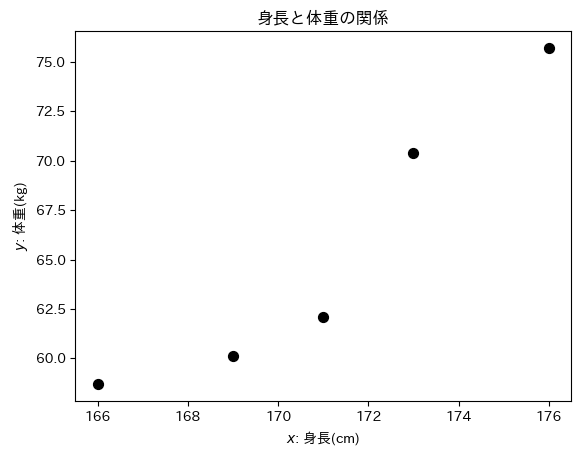

In [ ]:
!pip install japanize-matplotlib
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
japanize_matplotlib.japanize()

sampleData1 = np.array([
    [166, 58.7],
    [176.0, 75.7],
    [171.0, 62.1],
    [173.0, 70.4],
    [169.0, 60.1],
])
x = sampleData1[:,0]
y = sampleData1[:,1]
print(x)
print(y)
plt.scatter(x, y, c='k', s=50)
plt.xlabel('$x$: 身長(cm)')
plt.ylabel('$y$: 体重(kg)')
plt.title('身長と体重の関係')
plt.show()


[-5.  5.  0.  2. -2.]
[-6.7 10.3 -3.3  5.  -5.3]


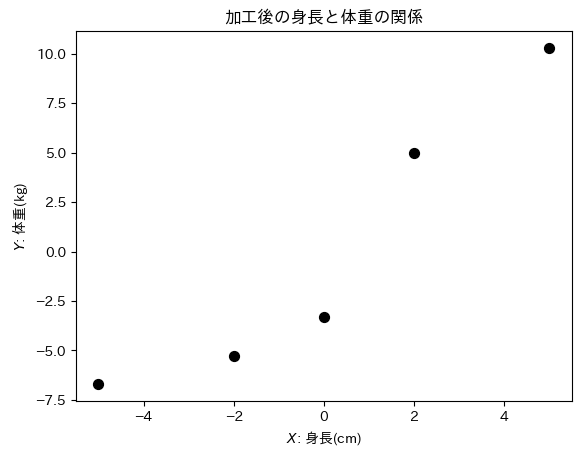

In [ ]:
# 平均値との差分として加工
X = x - x.mean()
Y = y - y.mean()
print(X)
print(Y)
plt.scatter(X, Y, c='k', s=50)
plt.xlabel('$X$: 身長(cm)')
plt.ylabel('$Y$: 体重(kg)')
plt.title('加工後の身長と体重の関係')
plt.show()


tensor([-4.,  6.,  1.,  3., -1.], grad_fn=<AddBackward0>)


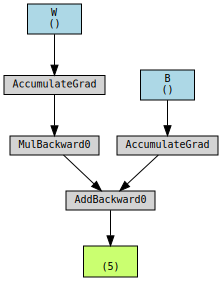

In [ ]:
# 予測関数の係数を計算
!pip install torchviz
import torch
import torchviz
from torchviz import make_dot

# テンソルの準備
X = torch.tensor(X).float()
Y = torch.tensor(Y).float()
W = torch.tensor(1.0, requires_grad=True, dtype=torch.float32)
B = torch.tensor(1.0, requires_grad=True, dtype=torch.float32)

# 予測関数
def pred(X):
  return W * X + B

Yp = pred(X)
print(Yp)

# 予測値の計算グラフ表示
params = {'W': W, 'B': B}
g = make_dot(Yp, params=params)
display(g)


tensor(13.3520, grad_fn=<MeanBackward0>)


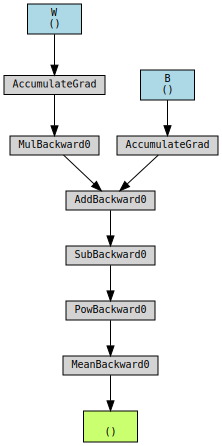

In [ ]:
# 損失関数
def mse(Yp, Y):
  loss = ((Yp - Y) ** 2).mean()
  return loss

loss = mse(Yp, Y)
print(loss)

# 損失の計算グラフ表示
params = {'W': W, 'B': B}
g = make_dot(loss, params=params)
display(g)

In [ ]:
# 勾配計算
loss.backward()

# 勾配値確認
print(W.grad)
print(B.grad)

# 学習率の定義
lr = 0.001
with torch.no_grad():
  W -= lr * W.grad
  B -= lr * B.grad
  W.grad.zero_()
  B.grad.zero_()

# パラメータと勾配値の確認
print(W)
print(B)
print(W.grad)
print(B.grad)


tensor(-19.0400)
tensor(2.0000)
tensor(1.0190, requires_grad=True)
tensor(0.9980, requires_grad=True)
tensor(0.)
tensor(0.)
